<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [0]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [0]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


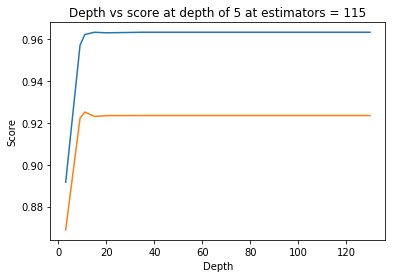

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [0]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


Train confusion_matrix


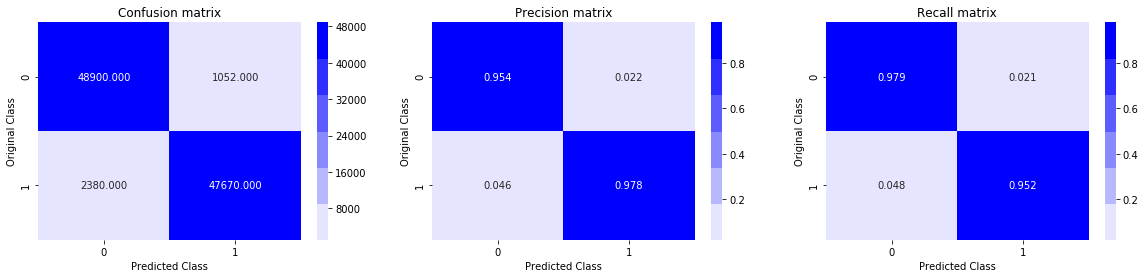

Test confusion_matrix


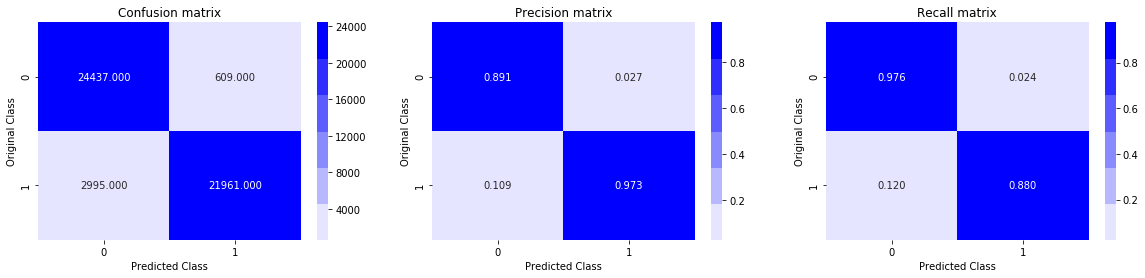

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

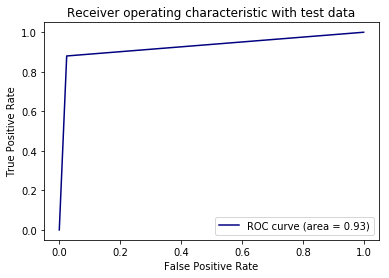

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

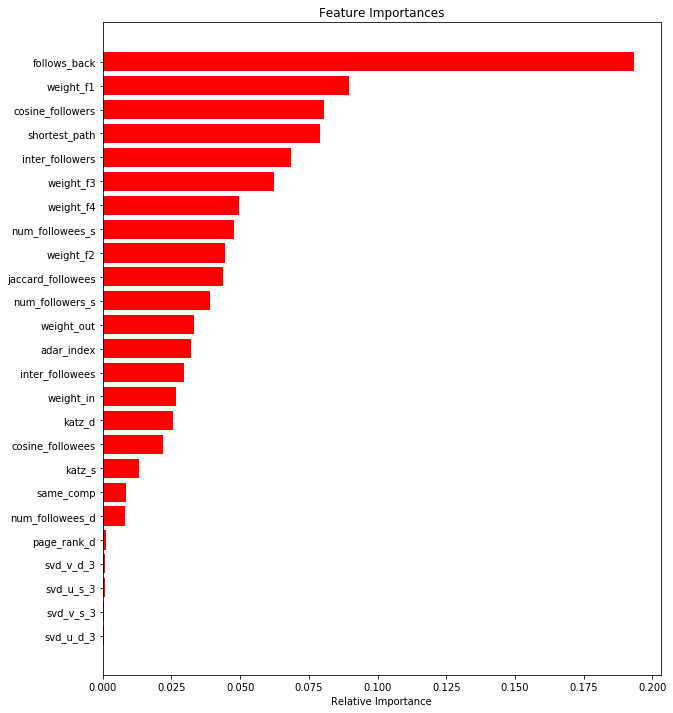

In [0]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

# 1. Part 1: Feature engineering 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#loading the training data in graph
import networkx as nx
graph_data = nx.read_edgelist('drive/My Drive/facebook_casestdy/train_pos_after_eda.csv',delimiter = ",",create_using = nx.DiGraph(),
                              nodetype = int)

In [0]:
#we get the final training and test data 
df_final_train = read_hdf('drive/My Drive/facebook_casestdy/storage_sample_stage4.h5','train_df',mode = 'r')#reading the training data
df_final_test = read_hdf('drive/My Drive/facebook_casestdy/storage_sample_stage4.h5','test_df',mode = 'r')#reading the test data

In [6]:
print('shape of final training data is:',df_final_train.shape)
print('shape of final test data is:',df_final_test.shape)

shape of final training data is: (100002, 54)
shape of final test data is: (50002, 54)


## 1.1 feature engineering 1 - Preferential attachment

In [0]:
#we will write functions to compute the preferentital attachment for followees and followers

def followees_pa(user1,user2):
    """This function computes the preferential attachment between followees of source and
    destination
    :input-user1,user2:the source and destination nodes
    :output-returns the product of number of follwees"""#where followees are those that are followed by the source and destination nodes
  try:
    user_1 = len(set(graph_data.successors(user_1)))#number of individuals followed by user1
    user_2 = len(set(graph_data.successors(user_2)))#number of individuals followed by user2
    return (user_1*user_2)
  except:
    return(0) #no pf if number of followees of any of them is 0



def followers_pa(user_1,user_2): 
     """This function computes the preferential attachment between followers of source and
    destination
    :input-user1,user2:the source and destination nodes
    :output-returns the product of number of followers"""#where followers are those following the source and destination nodes
  try:
    user_1 = len(set(graph_data.predecessors(user_1)))#number of individuals following user1
    user_2 = len(set(graph_data.predecessors(user_2)))#number of individuals following user2
    return (user_1*user_2)
  except:
    return(0) #no pf if number of followers of any of them is 0


In [0]:
#added features for training data
df_final_train['pa_followees'] = df_final_train.apply(lambda x: followees_pa(x['source_node'],x['destination_node']),axis = 1)
df_final_train['pa_followers'] = df_final_train.apply(lambda x: followers_pa(x['source_node'],x['destination_node']),axis = 1)

#added features for test data
df_final_test['pa_followees'] = df_final_test.apply(lambda x: followees_pa(x['source_node'],x['destination_node']),axis = 1)
df_final_test['pa_followers'] = df_final_test.apply(lambda x: followers_pa(x['source_node'],x['destination_node']),axis = 1)



In [0]:
del graph_data #delete the graph data to relaese some memory

## 1.2 Feature engineering 2 - SVD_DOT

In [0]:
# for product of respective elements of right and left orthogonal vectors in the singular value decomposition

#For training data
svd_u_s_train = df_final_train[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5','svd_u_s_6']]
svd_v_s_train = df_final_train[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5','svd_v_s_6']]
svd_u_d_train = df_final_train[['svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5','svd_u_d_6']]
svd_v_d_train = df_final_train[['svd_v_d_1','svd_v_d_2','svd_v_d_3','svd_v_d_4','svd_v_d_5','svd_v_d_6']]

#for test data
svd_u_s_test = df_final_test[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5','svd_u_s_6']]
svd_v_s_test = df_final_test[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5','svd_v_s_6']]
svd_u_d_test = df_final_test[['svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5','svd_u_d_6']]
svd_v_d_test = df_final_test[['svd_v_d_1','svd_v_d_2','svd_v_d_3','svd_v_d_4','svd_v_d_5','svd_v_d_6']]


In [0]:
#function for computing the svd
def compute_svd_dot(df1,df2):
    """Computes the respective right and left orthofonal vecotr values of source and destination"""
      svd_dot = []
          for i in range(0,df1.shape[0]):
        svd_dot.append(np.dot(df1.ix[i].values,df2.ix[i].values))
    #selectine the respective rows with .ix
        return svd_dot

In [0]:
df_final_train['svd_dot_u'] = compute_svd_dot(svd_u_s_train,svd_u_d_train)
df_final_train['svd_dot_v'] = compute_svd_dot(svd_v_s_train,svd_v_d_train)
df_final_test['svd_dot_u'] = compute_svd_dot(svd_u_s_test,svd_u_d_test)
df_final_test['svd_dot_v'] = compute_svd_dot(svd_v_s_test,svd_v_d_test)

In [14]:
print('After all the featurization final shape of the training data is:',df_final_train.shape)
print('After all the featurization final shape of the test data is:',df_final_test.shape)

After all the featurization final shape of the training data is: (100002, 58)
After all the featurization final shape of the test data is: (50002, 58)


In [15]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'pa_followees', 'pa_followers', 'svd_dot_u', 'svd_dot_v'],
      dtype='object')

In [0]:
y_train = df_final_train.indicator_link #target variable for training data
y_test = df_final_test.indicator_link #target variable for test data 

df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

# 2.Machine learning models

## Model 1 - Random Forest

## 2.1.1 Simply Tuning the number of estimators in RandomForest

In [ ]:
start = datetime.datetime.now()
estimators = [10,50,100,150,200,250,300,350,450,500]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    #we are considering here 
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.figure(figsize = (10,5))
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.grid()
plt.xlabel('Estimators',fontsize = 12)
plt.ylabel('Score',fontsize = 12)
plt.title('Estimators vs score at depth of 5',fontsize = 12)
print('total time taken:',datetime.datetime.now() - start)

We see the best number of estimators we have is 200 with maximum depth 5

## 2.1.2 Best classifier and feature importances

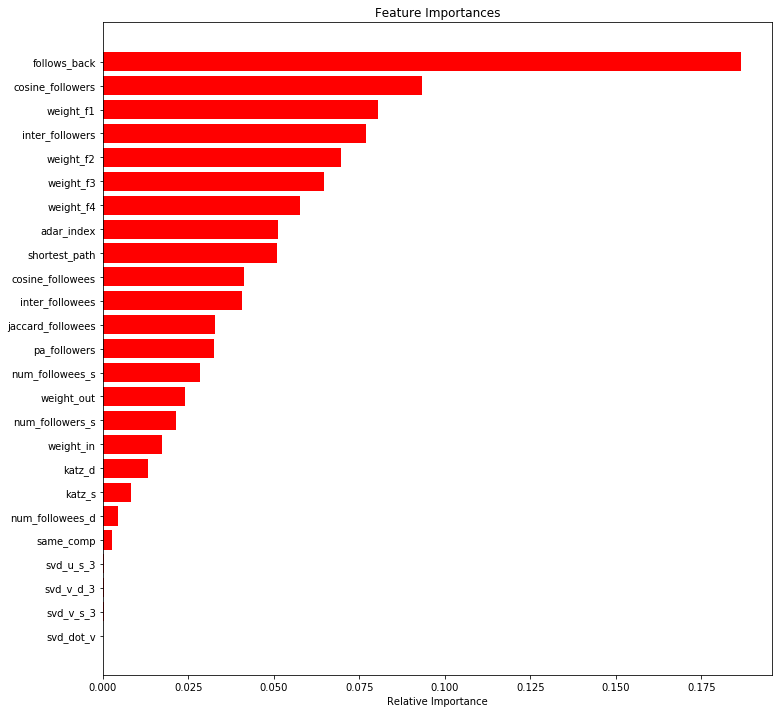

In [28]:
#fitting the best etimator in the model for feature importances 

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
clf.fit(df_final_train,y_train)
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]#we are considering here top 25 features 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 2.2.1 Tuning the depth in RandomForest

depth =  3 Train Score 0.9100877868473741 test Score 0.8975796072570266
depth =  9 Train Score 0.9579142403388036 test Score 0.9209777084168126
depth =  11 Train Score 0.9604904632152588 test Score 0.9247538086019695
depth =  15 Train Score 0.9630103985606685 test Score 0.9262395214625723
depth =  20 Train Score 0.962880942706217 test Score 0.9263556912709275
depth =  35 Train Score 0.9630058390454431 test Score 0.9261465283185655
depth =  50 Train Score 0.9630058390454431 test Score 0.9261465283185655
depth =  70 Train Score 0.9630058390454431 test Score 0.9261465283185655
depth =  130 Train Score 0.9630058390454431 test Score 0.9261465283185655


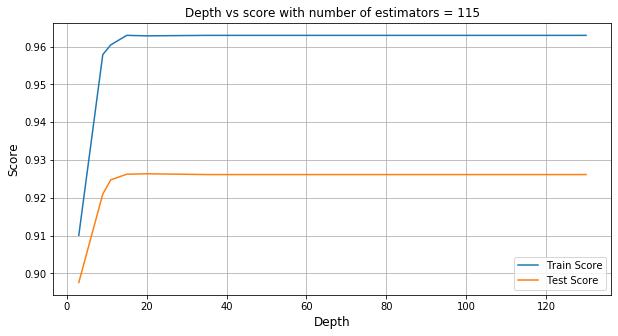

In [30]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    #wea re considering here the 
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.figure(figsize = (10,5))
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.grid()
plt.xlabel('Depth',fontsize = 12)
plt.ylabel('Score',fontsize = 12)
plt.title('Depth vs score with number of estimators = 115',fontsize = 12)
plt.legend(loc = 'best')
plt.show()

We see that the best score we get is at depth = 20

## 2.2.2 Best classifier and feature importances

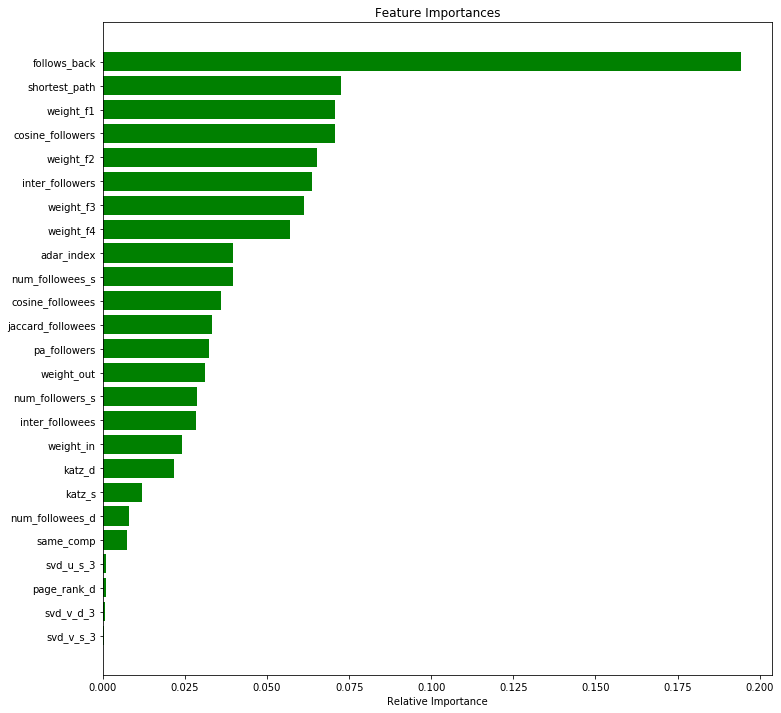

In [32]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
clf.fit(df_final_train,y_train)
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 2.3.1 Tuning the parameters for RandomForest using Randomized Search Cross validation

In [17]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint #for uniform discrete random variable
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),#number of estimator tress
              "max_depth": sp_randint(10,15),#the depth of the the trees
              "min_samples_split": sp_randint(110,190), #number of splits
              "min_samples_leaf": sp_randint(25,65)} #number of leafs
start = datetime.datetime.now() 
clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,verbose = 1,return_train_score = True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])
print('total time taken for computation is:',datetime.datetime.now() - start)#time taken 

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.8min finished


mean test scores [0.9615244  0.96117253 0.95967696 0.9607424  0.96274533]
mean train scores [0.96229498 0.96182509 0.96001391 0.96160653 0.96378369]
total time taken for computation is: 0:06:58.170276


In [18]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


## 2.3.2 Best Classifier and feature importances

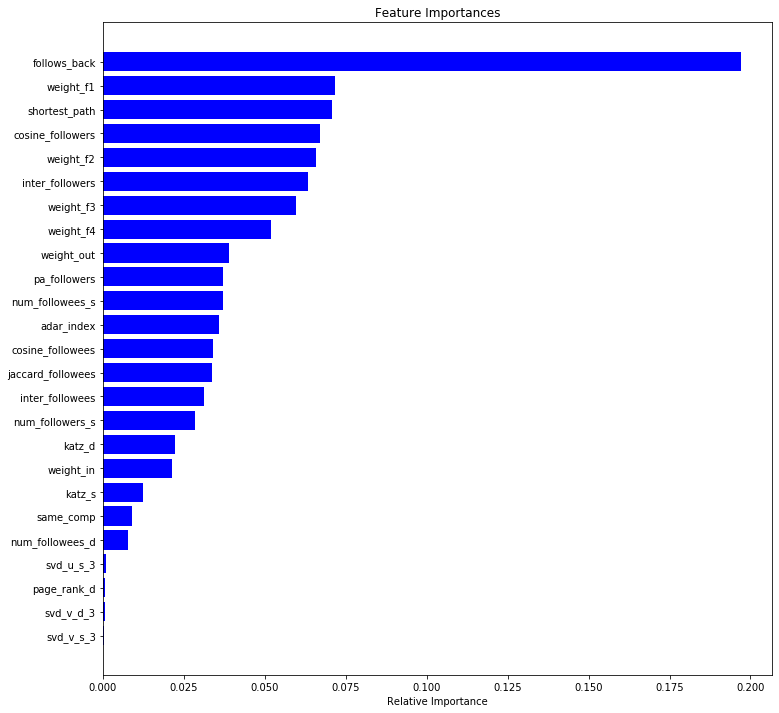

In [28]:
#training with the best model for feature importances

clf = rf_random.best_estimator_ #we get the best model
clf.fit(df_final_train,y_train)
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
#function for calculating the confusion,precison and recall matrix
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)#confusion matrix
    
    A =(((C.T)/(C.sum(axis=1))).T) #recallmatrix
    
    B =(C/C.sum(axis=0)) #precision matrix
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## 2.3.3 Confusion matrix and ROC curve

Train f1 score 0.9636850540666653
Test f1 score 0.9260287806109567
Train confusion_matrix


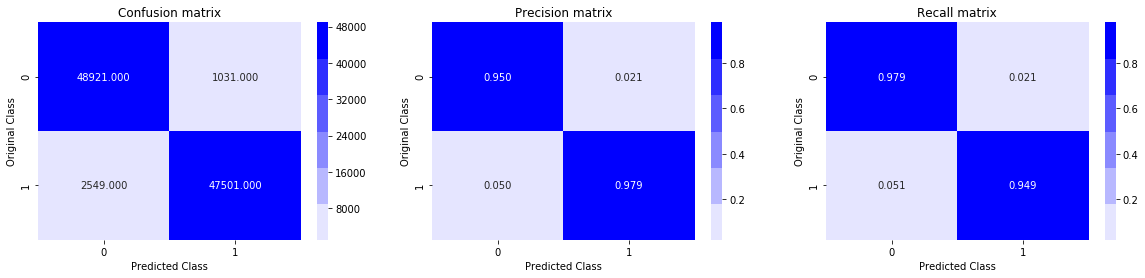

Test confusion_matrix


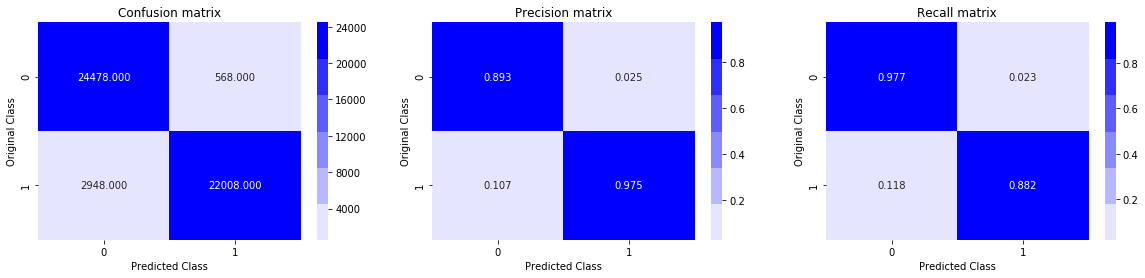

In [24]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))#best score with classifier
print('Test f1 score',f1_score(y_test,y_test_pred))#best test score with classifier

print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

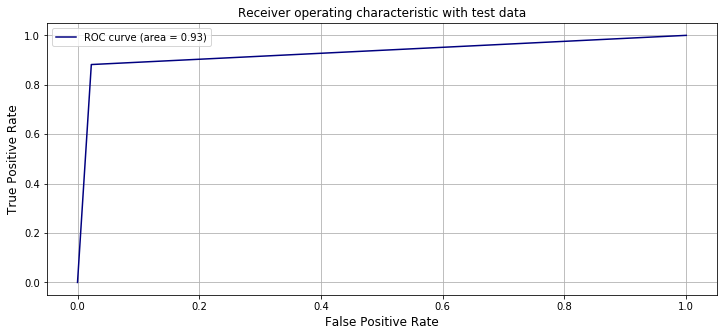

In [25]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.figure(figsize = (12,5))
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.grid()
plt.xlabel('False Positive Rate',fontsize = 12)
plt.ylabel('True Positive Rate',fontsize = 12)
plt.title('Receiver operating characteristic with test data',fontsize = 12)
plt.legend(loc = 'best')
plt.show()

## Model 2 - XGBoost

## 3.1.1Tuning the number of estimators in XGBoost

Estimators =  10 Train Score 0.9657533556878027 test Score 0.8849496002780675
Estimators =  50 Train Score 0.9736547367996206 test Score 0.8938228565203181
Estimators =  100 Train Score 0.9743248153082233 test Score 0.8941925912997949
Estimators =  150 Train Score 0.9744029715162404 test Score 0.8939512961508248
Estimators =  200 Train Score 0.9747113909744086 test Score 0.8942511181411584
Estimators =  250 Train Score 0.9747983972709198 test Score 0.894048840102132
Estimators =  300 Train Score 0.9748036583149947 test Score 0.8943245543214994
Estimators =  350 Train Score 0.974798905967724 test Score 0.8943511450381679
Estimators =  450 Train Score 0.9749500413798671 test Score 0.8941925912997949
Estimators =  500 Train Score 0.9749669555741659 test Score 0.8942536255588267
total time taken: 0:02:43.025765


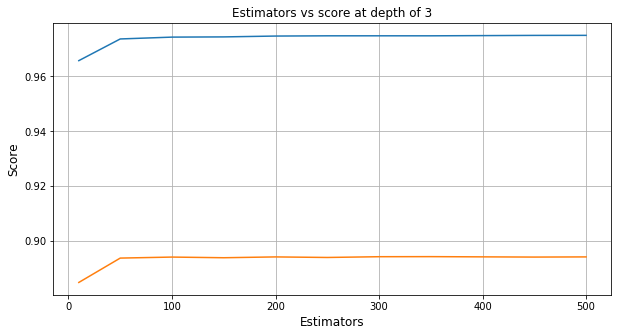

In [31]:
start = datetime.datetime.now()
estimators = [10,50,100,150,200,250,300,350,450,500]
train_scores = []
test_scores = []
for i in estimators:
    clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.02, gamma=0,
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=i, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=93, reg_lambda=1, reg_lamda=77, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.6, verbosity=1)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.figure(figsize = (10,5))
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.grid()
plt.xlabel('Estimators',fontsize = 12)
plt.ylabel('Score',fontsize = 12)
plt.title('Estimators vs score at depth of 3',fontsize = 12)
print('total time taken:',datetime.datetime.now() - start)

## 3.2 Tuning the depth in the Classifier

depth =  3 Train Score 0.9747983972709198 test Score 0.894048840102132
depth =  9 Train Score 0.9763506358603024 test Score 0.8915062386644231
depth =  11 Train Score 0.9760751059963659 test Score 0.8916099971574137
depth =  15 Train Score 0.9764268991684831 test Score 0.890990281061203
depth =  20 Train Score 0.9764059111312857 test Score 0.890168853069359
depth =  35 Train Score 0.976087658406651 test Score 0.8904166575438442
depth =  50 Train Score 0.976087658406651 test Score 0.8904166575438442
depth =  70 Train Score 0.976087658406651 test Score 0.8904166575438442
depth =  130 Train Score 0.976087658406651 test Score 0.8904166575438442


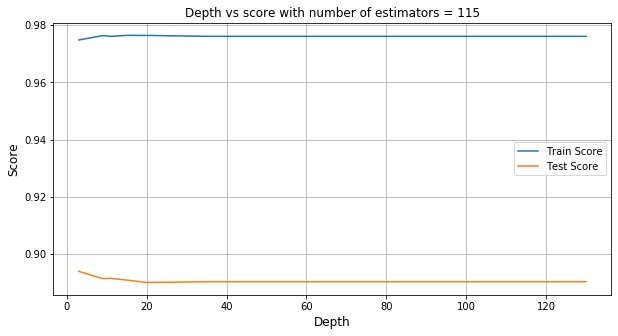

In [20]:
from xgboost import XGBClassifier
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.02, gamma=0,
              learning_rate=0.7, max_delta_step=0, max_depth=i,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=93, reg_lambda=1, reg_lamda=77, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.6, verbosity=1)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.figure(figsize = (10,5))
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.grid()
plt.xlabel('Depth',fontsize = 12)
plt.ylabel('Score',fontsize = 12)
plt.title('Depth vs score with number of estimators = 115',fontsize = 12)
plt.legend(loc = 'best')
plt.show()

## 3.3 Tuning the XGBClassifier using Randomized Search Cross validation

In [21]:
#importing all the libraries
rom xgboost import XGBRegressor

#Declaring parameters
params = {'learning_rate':[0.1,0.01,0.001,0.0001],
          'n_estimators':[250,500,750,1000,1500,2000,3000],
          'subsample':[0.6,0.7,0.8,0.9],
          'min_child_weight':[3,5,7,9],
          'reg_lambda':[100,200,300,400],
          'reg_alpha':[100,200,300, 400],
          'max_depth': [3,4,5,6,7,9],
          'colsample_bytree':[0.6,0.7,0.8],
          'gamma':[0,0.5,1]}

#Tuning hyperparameters
start =datetime.now()
print('Hyperparameter tuning: \n')
model= XGBRegressor(random_state=0,n_jobs=-1)
rsearch = RandomizedSearchCV(model,params,n_iter=20,scoring='neg_mean_absolute_error',cv=3,n_jobs=-1)
rsearch.fit(df_train, tsne_train_output)
print('Time taken to perform Hyperparameter tuning :',datetime.now()-start)

#Getting the best hyperparameter tuned model
best_model=rsearch.best_estimator_
print("Best estimator: ",best_model)

#Fitting the best model to our training data
best_model.fit(df_train, tsne_train_output)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 60.4min finished


Best hyperparameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.7, 'n_estimators': 750, 'reg_alpha': 93, 'reg_lamda': 77, 'subsample': 0.6}
mean test scores [0.92928731 0.93000827 0.96310668 0.86977193 0.96815021 0.92927881
 0.96207715 0.97308008 0.91276454 0.91798703]
mean train scores [0.9294994  0.93008222 0.9636366  0.86998695 0.96844007 0.92936659
 0.9623515  0.97410101 0.91275506 0.91800895]
total time taken for computation is: 1:01:05.735260


In [22]:
print('the best etimator is :',random_search.best_estimator_)

the best etimator is : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.02, gamma=0,
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=93, reg_lambda=1, reg_lamda=77, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.6, verbosity=1)


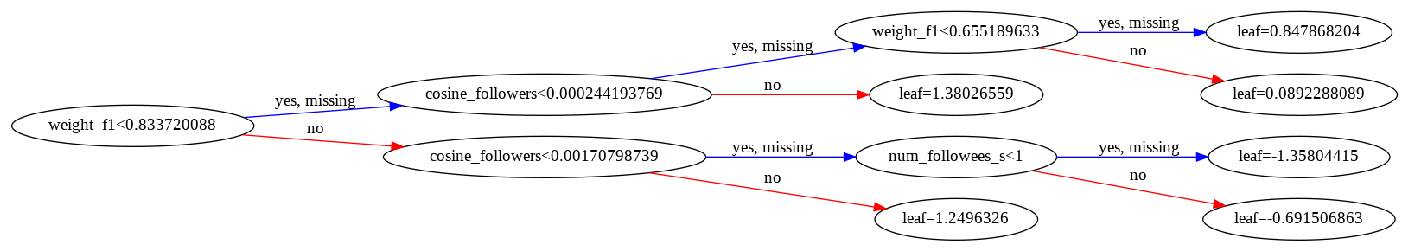

In [25]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.02, gamma=0,
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=93, reg_lambda=1, reg_lamda=77, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.6, verbosity=1) #best classifier

xgb.fit(df_final_train,y_train)
from xgboost import plot_tree

plot_tree(xgb,rankdir='LR')#visualizes the bossted decision trees
fig = plt.gcf()
fig.set_size_inches(25,20)
fig.savefig('tree.png')

## 3.3.1 Confusion matrix and ROC curve

Train f1 score 0.9752129506277502
Test f1 score 0.8942444003402324
Train confusion_matrix


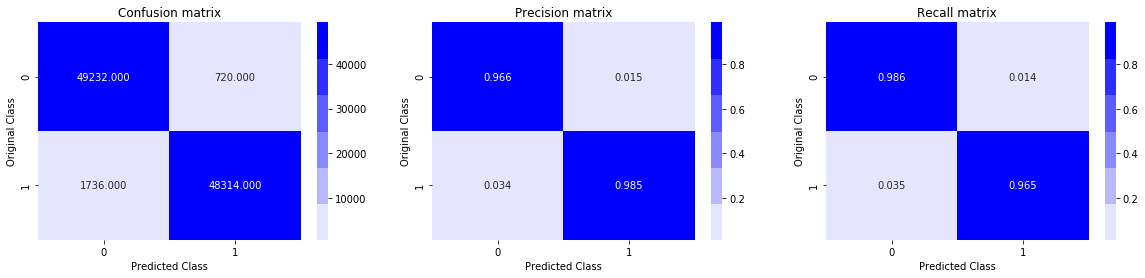

Test confusion_matrix


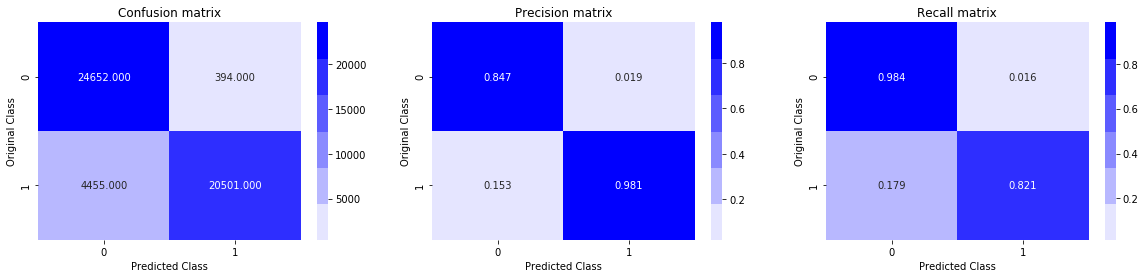

In [28]:
y_train_pred = xgb.predict(df_final_train)
y_test_pred = xgb.predict(df_final_test)
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

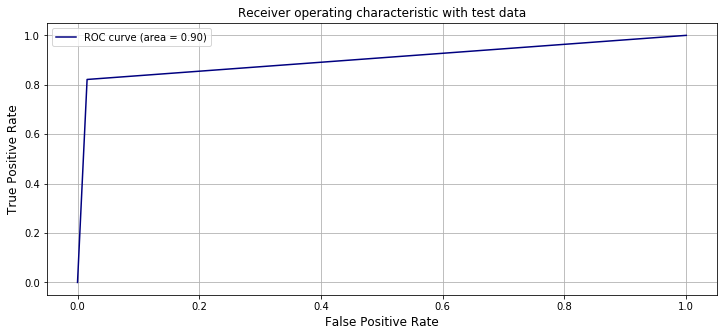

In [29]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.figure(figsize = (12,5))
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.grid()
plt.xlabel('False Positive Rate',fontsize = 12)
plt.ylabel('True Positive Rate',fontsize = 12)
plt.title('Receiver operating characteristic with test data',fontsize = 12)
plt.legend(loc = 'best')
plt.show()

# Conclusion 

In [11]:
from prettytable import PrettyTable

table_1 =PrettyTable()
table_1.field_names = ["Model", "Train F1", "Test F1"]
table_1.add_row(["Random Forest (tuning n_estimators)", 0.965, 0.924])
table_1.add_row(["Random Forest (tuning maximum depth)",0.962, 0.926])
table_1.add_row(["XGBoost (tuning n_estimators)", 0.974,0.894])
table_1.add_row(["XGBoost (tuning maximum depth)",0.974,0.894])
print('\t\tModels without hyperparameter tuning')
print(table_1)
print('\n\n')

table_2 =PrettyTable()
table_2.field_names = ["Model", "Train F1", "Test F1"]
table_2.add_row(["Random Forest",  0.963,0.926])
table_2.add_row(["XGboost", 0.975, 0.894])

print('Models with hyperparameter tuning using RandomizedCV')
print(table_2)

		Models without hyperparameter tuning
+--------------------------------------+----------+---------+
|                Model                 | Train F1 | Test F1 |
+--------------------------------------+----------+---------+
| Random Forest (tuning n_estimators)  |  0.965   |  0.924  |
| Random Forest (tuning maximum depth) |  0.964   |  0.926  |
|    XGBoost (tuning n_estimators)     |  0.974   |  0.894  |
|    XGBoost (tuning maximum depth)    |  0.974   |  0.894  |
+--------------------------------------+----------+---------+



Models with hyperparameter tuning using RandomizedCV
+---------------+----------+---------+
|     Model     | Train F1 | Test F1 |
+---------------+----------+---------+
| Random Forest |  0.963   |  0.926  |
|    XGboost    |  0.975   |  0.894  |
+---------------+----------+---------+


In this case  we are trying to find missing links which we will use for recommending friends or followers or in general recommending connections.Facebook created this to solve their business problem.The dataset is fairly reasonably sized to get a feel and understanding of how Network Analaysis works with Machine Learning in real world scenarios.Facebook has given this problem based on directed graphs which represent users on social network.The dataset only has source node information and destinatin node information. Here each node represents an user. Basically a link between source to destination means that a user follows another user.

In the given data, only those source and destination nodes are given for which an edge exists. There is no information about the nodes whcih does not have an edge between them. So, in order to map this problem to a binary classification problem of whether or not an edge exists in the graph, we need to create training and testing sample which has a class label of 0 (0 means that there are no edges present between source to destination).

NOTE: In the given dataset, we have roughly 9.43 million edges and 1.93 million nodes (vertices or users). For the given data, all the links are present and hence the class label will be 1. However, for classification we also need 0 class labels. How do we generate the 0 class labels?

Create the same number of 0 labeled pairs of vertices that we have for class 1 labeled pairs of vertices.
Randomly sample a pair of vertices
Check if the path length is greater than 2.
Check if no edge connection exists between the pairs of vertices.
If both the above conditions are satisfied then we will have a new pair of edges which will have a class label 0.
Coming to business constraints, there are no low latency requirements. We need to use probability estimates to predict edges between two nodes. This will give us more interpretability in terms of which edge connections are more important. The metric we have chosen is F1 score and binary confusion matrix.

We curated features like number of followers and followees of each node, whether or not a node is followed back by any other nodes, page rank of individual nodes, katz score, jaccard index, preferential attachment,svd features, svd dot features, adar index and so on. There were a total of 59 features on which we train and test our model.

There is not timestamp provided for this data. Ideally, if you think about it, we have the dataset for a given time stap t. However, the graph is evolving and changing over time. After 30 days the edge connections might change, because people might have new followers and they may even start to follow new people. In the real word, we would split the data according to time. But, since we do not have any information about time stamp, we will split the data randomly in 80:20 ratio. 80% for training data and 20% for cross validation data.

## Hyperparameter tuning using Randomized Searchc cross validaion was done for both the models and our f1 score imporved by a small margin for Randomr forest model ,where we got f1 score for training data 0.963 and for test data the score was 0.926

Another important observation was that the while calculating the feature importances we find that the feature 'follows_back'
is most important in almost all of the models 